In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Cargar el dataset procesado
data = pd.read_csv('data_evaluacion_processed.csv')

In [5]:
# Separar características y etiqueta
X = data.drop('salary', axis=1)
y = data['salary']

In [7]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Entrenar y evaluar el modelo de Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

In [13]:
# Evaluación del modelo
print('\nNaive Bayes')
print('Train Accuracy : %.5f' % nb.score(X_train_scaled, y_train))
print('Test Accuracy : %.5f' % nb.score(X_test_scaled, y_test))
print("Precisión del modelo:", accuracy_score(y_test, y_pred_nb))


Naive Bayes
Train Accuracy : 0.80565
Test Accuracy : 0.80540
Precisión del modelo: 0.8054048520831201


In [15]:
# Calcular y mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Clase 0', 'Clase 1'])


<Figure size 800x600 with 0 Axes>

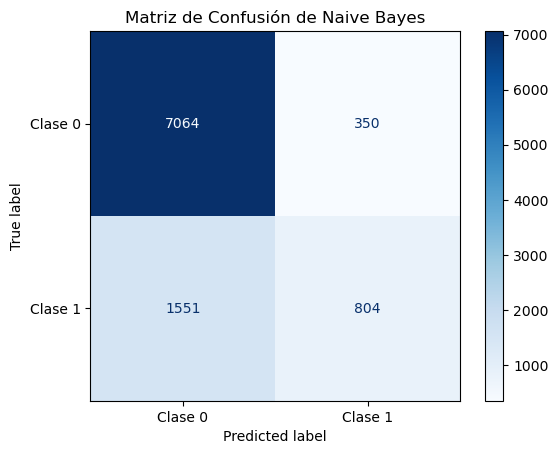

In [17]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Matriz de Confusión de Naive Bayes')
plt.show()